<a href="https://colab.research.google.com/github/SY-256/anomaly_detection/blob/main/notebook/chapter2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA & データの可視化

In [1]:
# コード2.4: CSVファイルの読み込みとデータフレームの可視化
import pandas as pd

# CSVからpandas.DataFrameにデータ読み込み
df = pd.read_csv("https://raw.githubusercontent.com/ghmagazine/python_anomaly_detection_book/refs/heads/main/notebooks/datasets/ch2_dataset_train.csv")
# データフレームの可視化
df

,temp1,temp2,temp3,temp4,temp5,label
0,395.667201,353.492396,296.235526,152.251354,102.821694,normal
1,405.759147,357.049093,301.924367,149.051272,99.949597,normal
2,398.291243,344.117095,297.268122,150.198092,103.381724,normal
3,404.623143,353.359488,302.000303,147.123352,NaN,normal
4,NaN,352.573113,300.566646,153.667624,99.536412,normal
...,...,...,...,...,...,...
1015,410.563978,371.046845,310.685632,149.932727,104.033215,anomaly
1016,407.942575,361.861342,307.837379,152.001137,94.640144,anomaly
1017,414.170014,367.637874,314.735181,147.082402,96.444778,anomaly
1018,417.024310,372.612626,311.234704,150.355261,98.739640,anomaly


In [2]:
# 正常データのみ抽出
df_normal = df[df["label"] == "normal"]

In [3]:
# 平均値の計算
# "label"列を削除（数値型の列のみとする）
df_normal_val = df_normal.drop("label", axis=1)

# 平均値の計算
mean = df_normal_val.mean() # 全変数の平均を計算
print(mean)

temp1    400.215529
temp2    350.259795
temp3    300.035526
temp4    150.009343
temp5     99.899621
dtype: float64


In [4]:
# 各種要約統計量の計算
# 結果格納用のDataFrame
df_summary_stats = pd.DataFrame(columns=df_normal_val.columns)
df_summary_stats.loc["mean"] = df_normal_val.mean() # 平均値
df_summary_stats.loc["median"] = df_normal_val.median() # 中央値
df_summary_stats.loc["mode"] = df_normal_val.mode().iloc[0] # 最頻値
df_summary_stats.loc["variance"] = df_normal_val.var(ddof=1) # 分散（不偏分散）
df_summary_stats.loc["srdev"] = df_normal_val.std(ddof=1) # 標準偏差（不偏標準偏差）
df_summary_stats.loc["skewness"] = df_normal_val.skew() # 歪度
df_summary_stats.loc["kurtosis"] = df_normal_val.kurtosis() # 尖度
df_summary_stats.loc["maximum"] = df_normal_val.max() # 最大値
df_summary_stats.loc["minimum"] = df_normal_val.min() # 最小値
df_summary_stats.loc["25%"] = df_normal_val.quantile(q=0.25) # 第一四分位点
df_summary_stats.loc["75%"] = df_normal_val.quantile(q=0.75) # 第三四分位点
# 計算した要約統計量を表示
print(df_summary_stats)

               temp1       temp2       temp3       temp4       temp5
mean      400.215529  350.259795  300.035526  150.009343   99.899621
median    400.239736  350.104220  299.870226  150.069451   99.833606
mode      385.135866  337.162795  287.628938  141.133144   91.248520
variance   24.610997   26.108685   15.975084    8.422278    9.440936
srdev       4.960947    5.109666    3.996884    2.902116    3.072611
skewness   -0.128235    0.124851    0.130807   -0.008248    0.044555
kurtosis   -0.281706   -0.045647   -0.059755    0.115450   -0.130130
maximum   414.660220  368.931121  312.059560  159.813078  109.178594
minimum   385.135866  337.162795  287.628938  141.133144   91.248520
25%       396.880776  346.824188  297.437192  148.113718   97.820981
75%       403.792623  353.546393  302.708459  151.735857  101.932281


In [5]:
# describeメソッドによる要約統計量の計算
df_summary_describe = df_normal_val.describe()
# 計算した要約統計量を表示
print(df_summary_describe)

            temp1        temp2        temp3        temp4       temp5
count  912.000000  1000.000000  1000.000000  1000.000000  936.000000
mean   400.215529   350.259795   300.035526   150.009343   99.899621
std      4.960947     5.109666     3.996884     2.902116    3.072611
min    385.135866   337.162795   287.628938   141.133144   91.248520
25%    396.880776   346.824188   297.437192   148.113718   97.820981
50%    400.239736   350.104220   299.870226   150.069451   99.833606
75%    403.792623   353.546393   302.708459   151.735857  101.932281
max    414.660220   368.931121   312.059560   159.813078  109.178594


In [6]:
# 各変数の欠損値の数の算出
df_missing = pd.DataFrame(columns=df_normal.columns) # 結果格納用のDataFrame（カテゴリ変数も含める）
df_missing.loc["not_missing"] = df_normal.count() # 欠損していないデータの個数
df_missing.loc["missing"] = df_normal.isnull().sum() # 欠損値の個数
# データの総数（欠損値+欠損していないデータ）
df_missing.loc["total"] = len(df_normal)
# 欠損率
df_missing.loc["missing_ration"] = df_missing.loc["missing"] / df_missing.loc["total"]
# 計算した要約統計量を表示
print(df_missing)

                   temp1   temp2   temp3   temp4     temp5   label
not_missing      912.000  1000.0  1000.0  1000.0   936.000  1000.0
missing           88.000     0.0     0.0     0.0    64.000     0.0
total           1000.000  1000.0  1000.0  1000.0  1000.000  1000.0
missing_ration     0.088     0.0     0.0     0.0     0.064     0.0


In [7]:
# 分散共分散行列を算出
cov_mat = df_normal_val.cov(ddof=0)
# 計算した分散共分散行列を表示
print(cov_mat)

           temp1      temp2      temp3     temp4     temp5
temp1  24.610997  14.544698   9.608153  0.645634 -0.657667
temp2  14.544698  26.108685  12.800128  0.735185 -0.530256
temp3   9.608153  12.800128  15.975084  0.536521  0.006123
temp4   0.645634   0.735185   0.536521  8.422278 -0.009119
temp5  -0.657667  -0.530256   0.006123 -0.009119  9.440936


In [9]:
# 分散が大きい変数は共分散も大きくなりやすい
# 相関が強くても分散が小さいと共分散は小さくなる
# ⇒相関の強さそのものを直接比較するには不向き

In [10]:
# 共分散を両変数の標準偏差で割ってスケールを揃えることで、相関の大きさ自体を評価できるようにした指標
# ⇒相関係数

In [12]:
# 相関係数行列の計算
# 相関係数行列を算出
corr_mat = df_normal_val.corr(method="pearson") # ピアソンの積率相関係数
# 計算した相関係数行列を表示
print(corr_mat)

          temp1     temp2     temp3     temp4     temp5
temp1  1.000000  0.574214  0.479974  0.044886 -0.043389
temp2  0.574214  1.000000  0.626759  0.049578 -0.033635
temp3  0.479974  0.626759  1.000000  0.046254  0.000495
temp4  0.044886  0.049578  0.046254  1.000000 -0.001025
temp5 -0.043389 -0.033635  0.000495 -0.001025  1.000000


In [13]:
# 数値指標では把握できない特徴
# 1. 平均値と分散を同じくする複数の分布が、実際には全くことなる形状をとる（正規分布、裾の重い分布、多峰性など）
# 2. 相関係数が0に近いが、非線形の相関係数を持つ（例：U字型の関係）

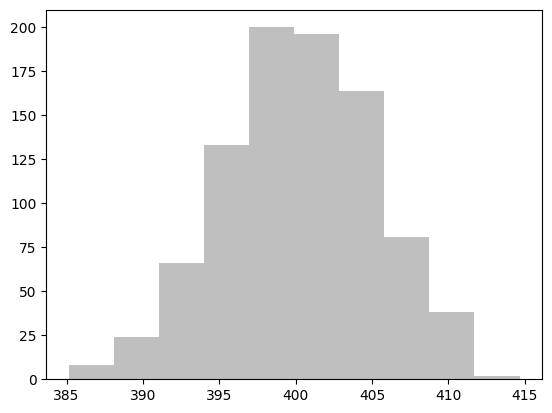

In [15]:
# matplotlibのpyplot APIによるヒストグラムの描画
import matplotlib.pyplot as plt

# 変数"temp1"のヒストグラムを表示（カラーコードで色指定）
plt.hist(x=df_normal_val["temp1"], color="#88888888")
plt.show()

ヒストグラムの形状はビン数により⼤きく変わるため、適切な分布形状の把握にはビン数の選択が重要です。
ビン数を手動で指定することもできますが、適切なビン数を⾃動で計算する方法として、以下の**スタージェスの公式**（Sturges’ rule）がよく利用されます。

<img src="https://latex.codecogs.com/svg.image?
n_h = \log 2(N) + 1
" />

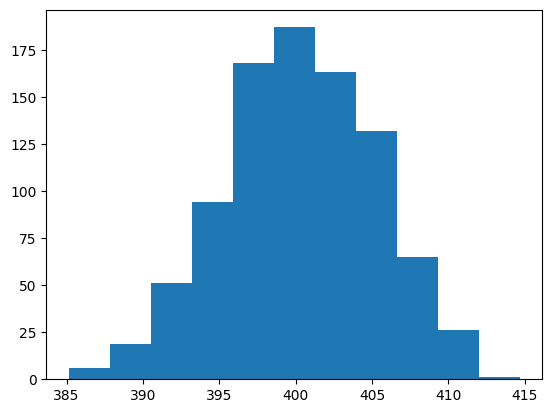

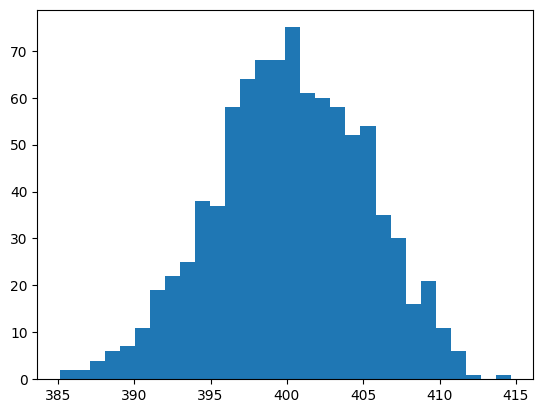

In [16]:
# スタージェンスの公式の適用
# スタージェンスの公式に基づきビン数を指定（ビン数=11）
plt.hist(x=df_normal_val["temp1"], bins="sturges")
# 1枚目の図を表示
plt.show()

# ビン数を30に指定
plt.hist(x=df_normal_val["temp1"], bins=30)
# 2枚目の図を表示
plt.show()

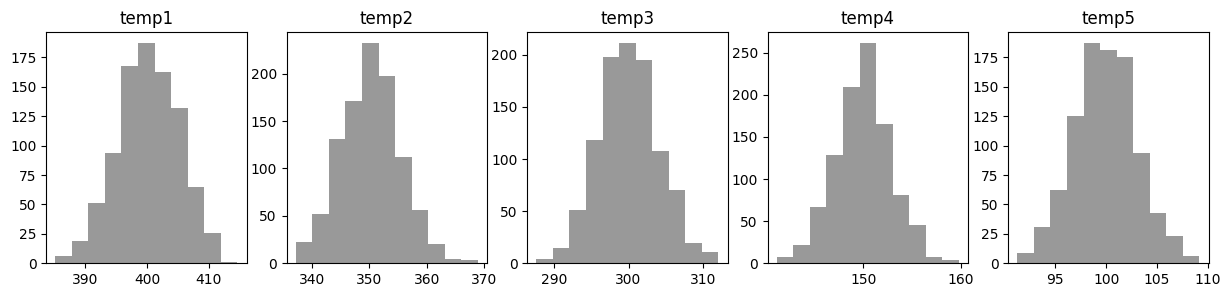

In [17]:
# MatplotlibのAxesによるヒストグラムの描画
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# すべての変数をループで走査
for i, colname in enumerate(df_normal_val.columns):
    # Axes.hist()メソッドでヒストグラム描画（スタージェンスの公式適用）
    axes[i].hist(x=df_normal_val[colname], bins="sturges",
                 color="#999999")
    # 変数名を図のタイトルとして追加
    axes[i].set_title(colname)

# 図を表示
plt.show()

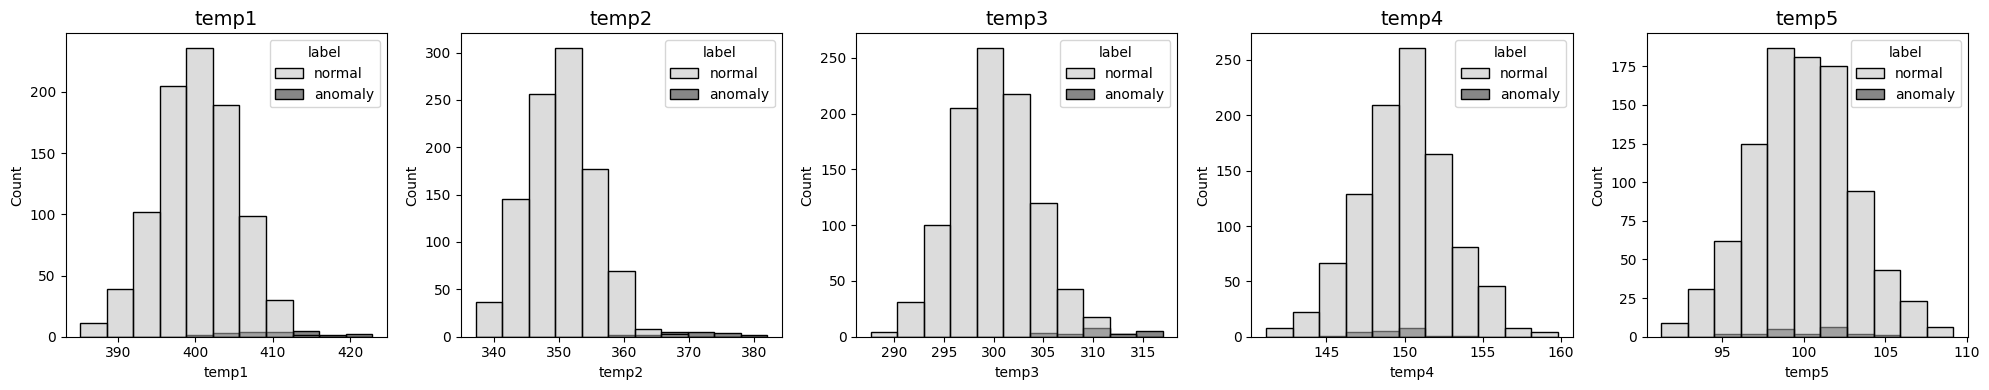

In [18]:
# Seabornによるヒストグラムの描画
import seaborn as sns

# 描画用
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# すべての変数をループで走査
for i, colname in enumerate(df_normal_val.columns):
    # sns.histplot()関数でヒストグラム描画
    sns.histplot(
        data=df,
        x=colname,
        hue="label", # 色分け対象の列名
        multiple="layer", # 色分けデータを積み上げるか重ねるか
        bins="sturges",
        palette=["#bbbbbb", "#111111"], # 色分けのカラーパレット
        ax=axes[i], # 描画対象のAxes
    )

    # 変数名を図のタイトルとして追加
    axes[i].set_title(colname, fontsize=14)

# 字が重なるのを防ぐ
plt.tight_layout()
plt.show()

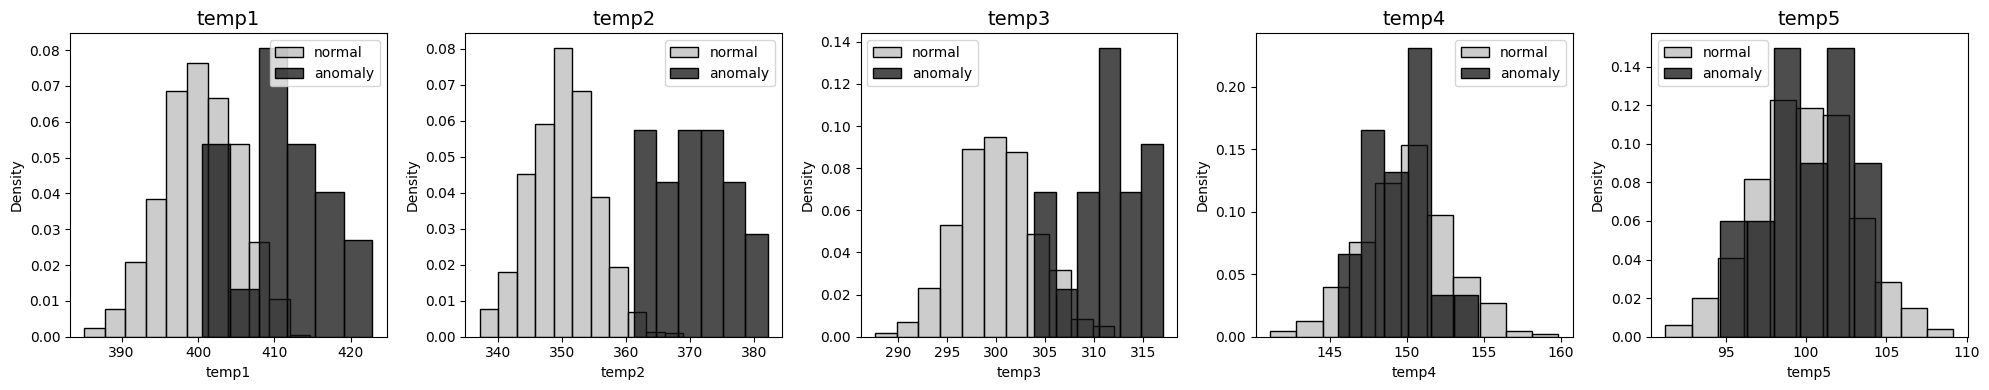

In [19]:
from numpy import ndenumerate
# 縦軸を確率密度にしてプロット
# 異常データのみ抽出
df_anomaly_val = df[df["label"] == "anomaly"].drop("label", axis=1)
# 描画用
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# すべての変数をループで走査
for i, colname in enumerate(df_normal_val.columns):
    # 正常データのヒストグラム描画
    sns.histplot(data=df_normal_val[colname], bins="sturges",
                 color="#bbbbbb", ax=axes[i],
                 stat="density", label="normal")
    # 異常データのヒストグラム描画
    sns.histplot(data=df_anomaly_val[colname], bins="sturges",
                 color="#111111", ax=axes[i],
                 stat="density", label="anomaly")
    # 凡例を追加
    axes[i].legend()
    # 変数名を図のタイトルとして追加
    axes[i].set_title(colname, fontsize=14)

plt.tight_layout()
plt.show()

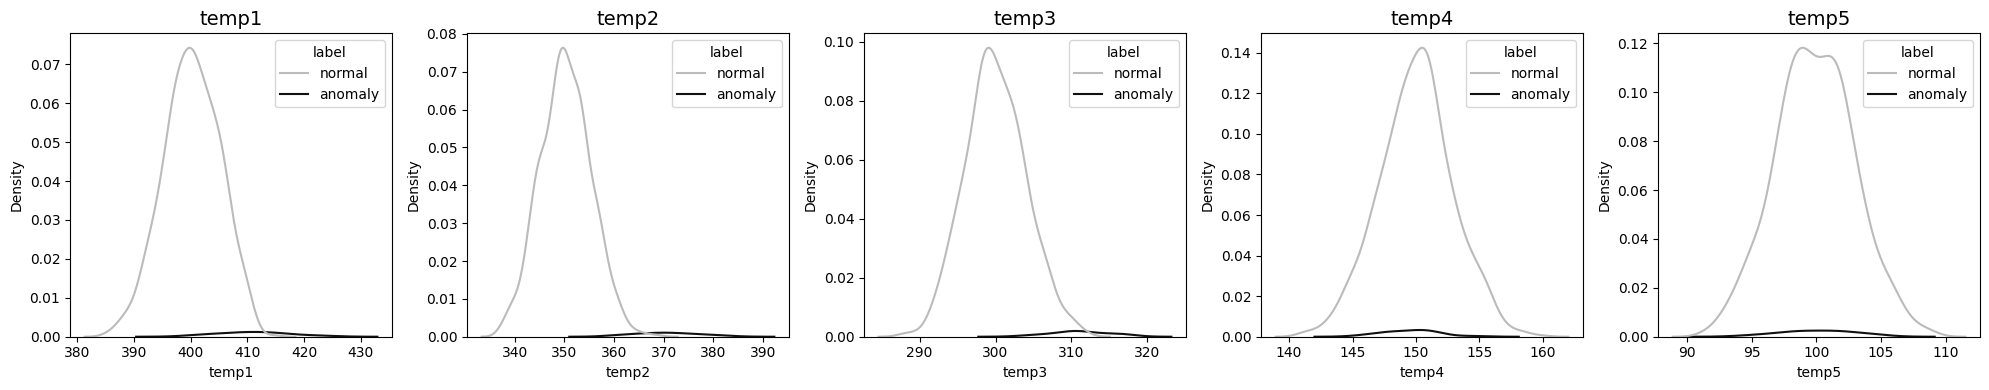

In [20]:
# KDE（カーネル密度関数）の描画
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
# すべての変数をループで走査
for i, colname in enumerate(df_normal_val.columns):
    # sns.kdeplot()でKDE描画
    sns.kdeplot(
        data=df,
        x=colname,
        hue="label",
        multiple="layer",
        palette=["#bbbbbb", "#111111"],
        ax=axes[i],
    )
    axes[i].set_title(colname, fontsize=14)

plt.tight_layout()
plt.show()

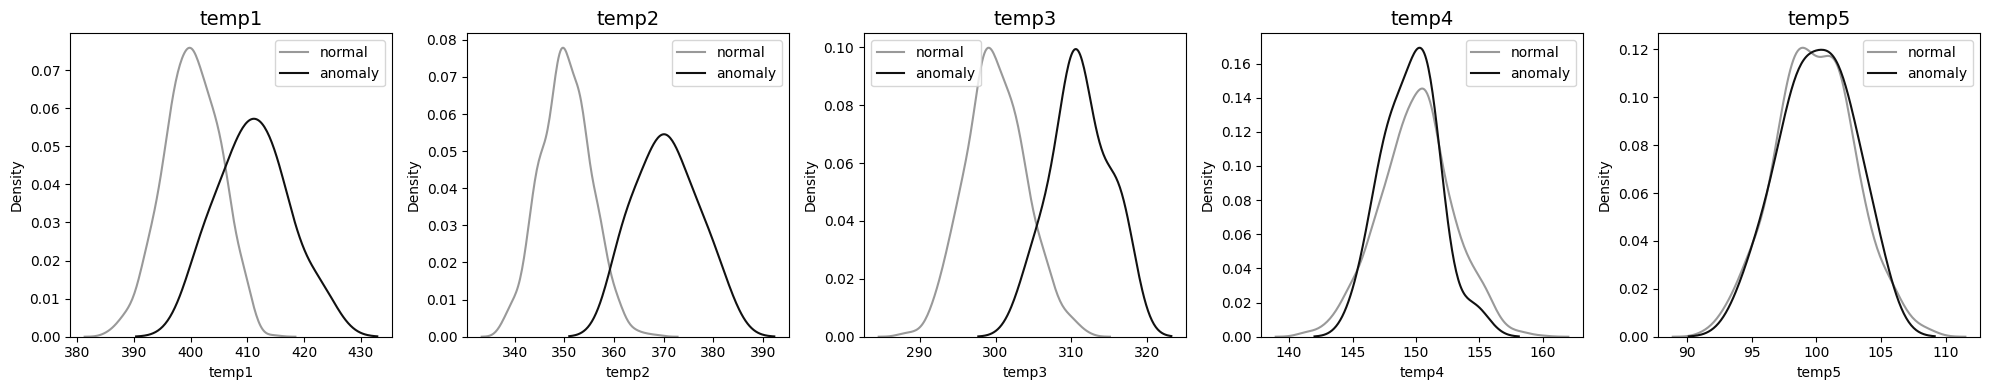

In [21]:
# 正常データと異常データから別々に推定したKDEの描画
# 異常データのみ抽出
df_anomaly_val = df[df["label"] == "anomaly"].drop("label", axis=1)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i, colname in enumerate(df_normal_val.columns):
    # sns.kdeplot()関数でカーネル密度関数を描画
    # 正常データ
    sns.kdeplot(data=df_normal_val, x=colname, color="#999999",
                ax=axes[i], label="normal")
    # 異常データ
    sns.kdeplot(data=df_anomaly_val, x=colname, color="#111111",
                ax=axes[i], label="anomaly")
    # 色分け凡例作成
    axes[i].legend()
    axes[i].set_title(colname, fontsize=14)

plt.tight_layout()
plt.show()